In [1]:
from amnesiac import blurry_memory
import random
import numpy as np
import matplotlib.pyplot as plt
import time
import string

In [2]:
random.seed(10)
passcode_length = 10
# passcode_lower_bound = 0
# passcode_upper_bound = 9
passcode_options = list(string.ascii_uppercase+string.digits+'_')
np.random.shuffle(passcode_options)
print(passcode_options)

['_', 'J', 'W', 'E', 'B', 'X', 'T', 'S', 'N', 'K', '9', 'Z', 'I', 'P', 'Q', 'R', '2', 'O', 'L', '6', '1', '4', 'H', 'C', 'U', '3', '0', 'V', '8', 'G', 'M', 'A', '7', '5', 'D', 'F', 'Y']


In [3]:
population_size = 100
num_parents = 20
elite_size = 2

In [4]:
population = []
for i in range(population_size):
    chromosome = []
    for x in range(passcode_length):
#         chromosome.append(int(round(random.uniform(passcode_lower_bound,passcode_upper_bound),0)))
        chromosome.append(random.choice(passcode_options))
    population.append(chromosome)

In [5]:
def fitness(population):
    fitness_scores = []
    for chromosome in population:
        matches = 0
        str_chromosome = "".join(chromosome)
        matches_percentage = blurry_memory([str_chromosome],190573735,0)[str_chromosome]
        match = int(matches_percentage*10)        
        result = [chromosome,match]
        fitness_scores.append(result)
    return fitness_scores
    

In [6]:
def select_parents(fitness_scores):
    parents_list = []
    for chromosome in sorted(fitness_scores, key=lambda x: x[1], reverse = True)[:num_parents]:
        parents_list.append(chromosome[0])
    return(parents_list)

In [7]:
# breeding logic
def breed(parent1,parent2):
    child = []

    parent1 = parents[0]
    parent2 = parents[1]

    geneA = int(random.random() * passcode_length)
    geneB = int(random.random() * passcode_length)

    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(0,passcode_length):
        if (i < startGene) or (i > endGene):
            child.append(parent1[i])
        else:
            child.append(parent2[i])
    return child

# breeding and elitism
def create_children(parents_pool):
    children = []
    num_new_children = len(population) - elite_size

    for i in range(0,elite_size):
        children.append(parents_pool[i])

    for i in range(0,num_new_children):
        parent1 = parents_pool[int(random.random() * len(parents_pool))]
        parent2 = parents_pool[int(random.random() * len(parents_pool))]
        children.append(breed(parent1,parent2))
#     print(children)
    return children

In [8]:
def mutation(children_set):
    for i in range(len(children_set)):
        if random.random() > 0.2:
            continue
        else:
            mutated_position = int(random.random() * passcode_length)
#             mutation = int(round(random.uniform(passcode_lower_bound,passcode_upper_bound+1),0))
            mutation = random.choice(passcode_options)
            children_set[i][mutated_position] = mutation
    return children_set

In [9]:
# success = []
# generations = 0
# t0 = time.time()
# while True:

#     fitness_scores = fitness(population)
#     success.append(max([i[1] for i in fitness_scores]))
#     if max([i[1] for i in fitness_scores]) == passcode_length:
#         print("Cracked in {} generations, and {} seconds! \nDiscovered passcode = {}".format(generations,time.time() - t0,[i[0] for i in fitness_scores if i[1] == passcode_length][0]))
#         break
#     parents = select_parents(fitness_scores)
#     children = create_children(parents)
#     population = mutation(children)
#     generations += 1

In [10]:
fitness_tracker = []
solutions = []
generations = 0
t0 = time.time()
while True:

    fitness_scores = fitness(population)
    fitness_tracker.append(max([i[1] for i in fitness_scores]))
    solutions.append(''.join([i[0] for i in fitness_scores if i[1] == max([i[1] for i in fitness_scores])][0]))
#     print(''.join([i[0] for i in fitness_scores if i[1] == max([i[1] for i in fitness_scores])][0]))
    if max([i[1] for i in fitness_scores]) == passcode_length:
        print("Cracked in {} generations, and {} seconds! \nDiscovered passcode = {}".format(generations,time.time() - t0,[i[0] for i in fitness_scores if i[1] == passcode_length][0]))
        break
    parents = select_parents(fitness_scores)
    children = create_children(parents)
    population = mutation(children)
    generations += 1

Cracked in 125003 generations, and 138.10727453231812 seconds! 
Discovered passcode = ['C', 'H', 'U', 'K', 'N', '0', '8', '8', 'I', 'S']


/home/nv/virtpy3tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


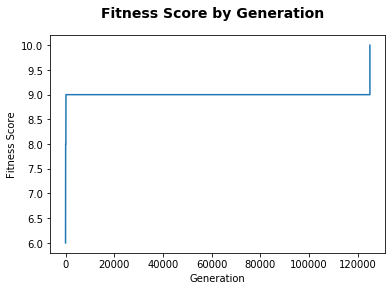

In [11]:

fig = plt.figure()
plt.plot(list(range(generations+1)), fitness_tracker)
fig.suptitle('Fitness Score by Generation', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.set_xlabel('Generation')
ax.set_ylabel('Fitness Score')
plt.show()